# Lab 4-3 Linear Regression

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 준비

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 모델생성 및 훈련

### 모델 생성

In [4]:
lr = LinearRegression()

### 훈련

In [5]:
lr.fit(train_input, train_target)

LinearRegression()

### 평가

In [9]:
lr.score(test_input, test_target)

0.8247503123313558

In [8]:
lr.score(train_input, train_target)

0.939846333997604

### 예측

In [12]:
lr.predict([[50]])

array([1241.83860323])

In [13]:
lr.predict([[100]])

array([3192.69585141])

## 시각화

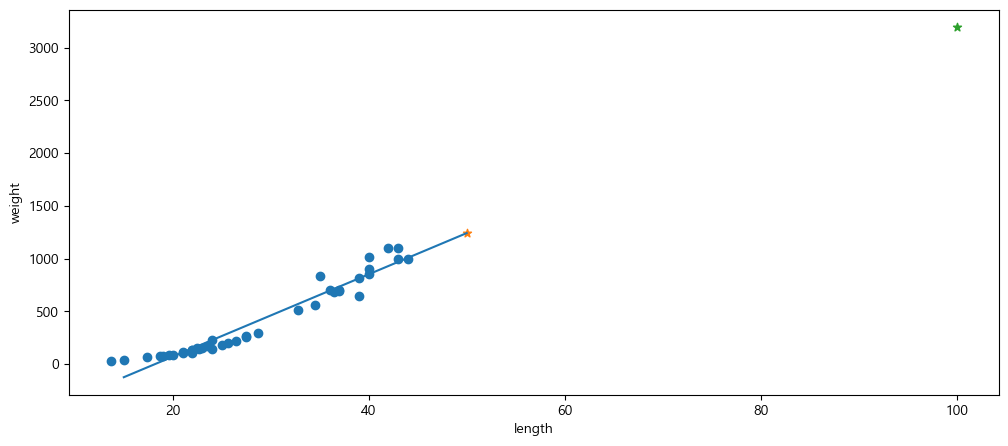

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(train_input, train_target)

plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='*')
plt.scatter(100, 3192.7, marker='*')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## 문제

### 길이 15cm인 농어의 무게를 예측

In [43]:
lr.predict([[15]])

array([-123.7614705])

In [44]:
import plotly.express as px
import plotly.graph_objects as go

### 아래 코드를 실행하여 농어 데이터를 DataFrame으로 생성합니다.

In [45]:
perchs = [[l,w] for l,w in zip(perch_length, perch_weight)]

df = pd.DataFrame(perchs, columns=['length', 'weight'])

In [46]:
fig = px.scatter(df, x='length', y='weight',trendline='ols', width=1000, height=500)
fig.add_trace(go.Scatter(x=[15], y=[-123.8]))
fig.show()